# Convnet

## 1. convolution neural network 소개

In [3]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))

* Convnet의 기본적인 모습; Con2D와 MaxPooling2D 층을 쌓아 올림
* input tensor가 (image_height, image_width, image_channels)크기의 tensor 사용

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


* Conv2D와 MaxPooling2D 층의 출력은 (height, width, channels)크기의 3D tensor
* feature map의 크기는 network가 깊어질수록 작아지는 경향이 있다
* ch 수는 Conv2D 층에 전달된 첫번째 매개변수에 의해 조절

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

* conv network 마지막 layer에서의 출력 tensor(3,3,64)를 fully connected net(Dense layer)에 주입
* 10개의 CLASS를 분류하기 위해 마지막 층의 출력 크기를 10으로 하고 Softmax 활성화 함수 사용

> WARN   
> Dense layer classification은 1D vector 처리하므로, 3D tensor 출력을 1D tensor로 펼쳐야함

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 2s 0us/step


In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 13s 13ms/step - loss: 0.4728 - accuracy: 0.8501
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0633 - accuracy: 0.9815
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0430 - accuracy: 0.9863
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0327 - accuracy: 0.9902
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0267 - accuracy: 0.9918


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0464 - accuracy: 0.9862


In [10]:
test_acc

0.9861999750137329

### **1)Convolution**

Dense layer와 conv layer의 근본적인 차이는 전역 패턴을 학습하는지 지역 패턴을 학습하는지이다.
>context: 이웃한 pixel간의 관계, img 맥락
* Dense 층은 입력 특성 공간에 있는 전역 패턴을 학습 -> context 인식에 능함
* conv 층은 지역패턴을 학습->localization
    + layer를 거칠 수록 더욱 지역적
    
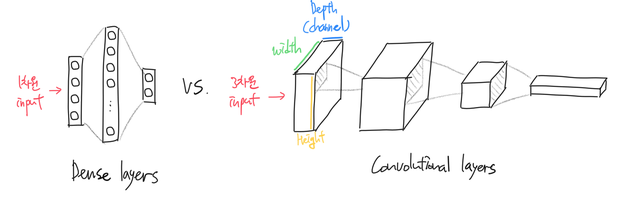
> Dense layer에서 각 입력 샘플을 1차원의 벡터 데이터로 보았다면,   
Convolutional layer는 입력 샘플을 3차원의 텐서(Tensor) 데이터로 인식한다.   
Convolutional layer는 입력 3차원 데이터를 적절히 변형해서 또다른 3차원 데이터를 출력한다.

convolution은 feature map이라 불리는 3D tensor에 적용된다
* feature map은 2개의 공간축과 깊이 축으로 구성
    + 공간 축: width, heigh
    + 깊이 축: ch

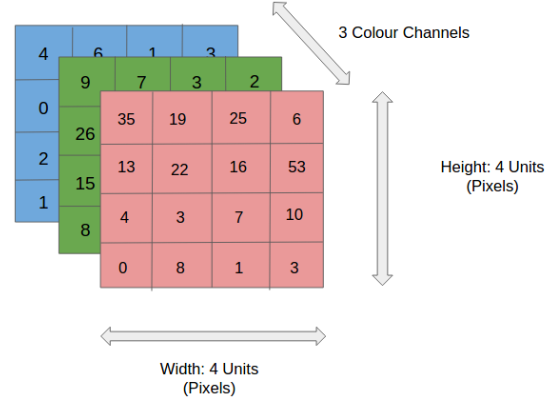

#### 1.1 kernel
* convolitional layer에서는 input image의 크기인 feature map으로 부터 입력을 받게 되는데 지역 패턴을 학습하기 위해 feature map에 kernel 혹은 filter라 불리는 정사각 행렬을 적용해 convolution 수행
* input data의 어떤 feature을 encoding함
    + kernel의 경우 3x3, 5x5크기로 적용되는 것이 일반적
    + feature map의 
    + **stride**라 불리는 지정된 간격에 따라 순차적으로 이동


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

(26,26,32)크기의 feature map을 출력
* 즉, 32개의 filter 적용
* 26x26 값은 입력에 대한 filter의 response map

>Feature map    
> 깊이 축에 있는 각 차원은 하나의 filter이고,    
> 2D tensor output[:,:,n]은 input에 대한 이 filter 응답을 나타내는 2D 공간상의 map이다


#### 1.2 padding

합성곱 연산을 수행할 경우 단점이 존재하는데, 바로 위에서 살펴보았듯이 kernel과 stride의 작용으로 인해 원본 크기가 줄어든다는 것이다. 
* Feature Map의 크기가 작아지는 것을 방지하기 위해서 Padding이란 기법을 이용
* 단순히 원본 이미지에 0이라는 padding값을 채워 넣어 이미지를 확장한 후 합성곱 연산을 적용
* 원본 이미지의 크기를 줄이지 않으면서 합성곱 연산을 수행가능하게 해주는 것이 바로 padding의 역할


#### 1.3 stride
* defalt:conv window의 중앙 타일이 연속적으로 지나간다고 가정, 기본값=1
> stride 2를 사용했다는 것은 feature map의 너비와 높이가 2의 배수로 down sampling 되었다는 뜻

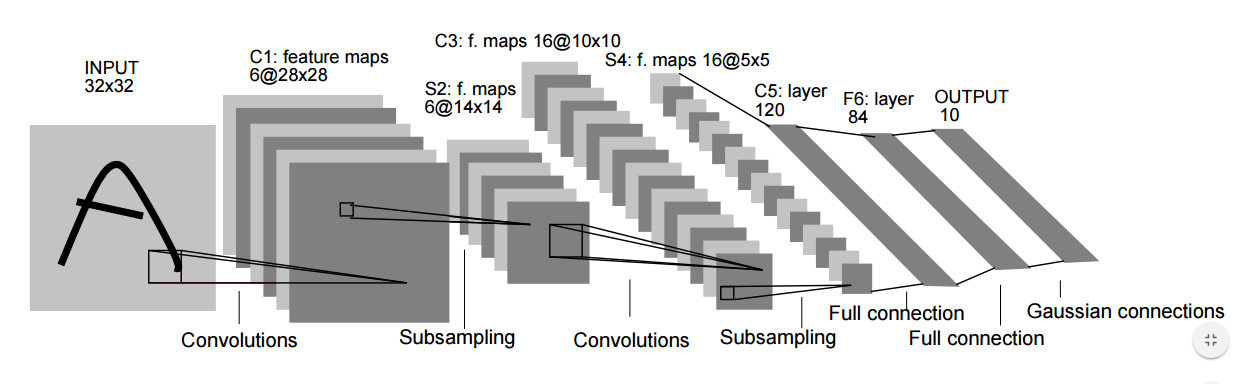

### 2) MaxPooling 
feature map을 down sampling하기 위해서 stride 대신 maxpooling 연산을 사용하는 경우가 많음   
* input feature map에서 window에 맞는 patch를 추출하고 각 채널별로 최댓값을 출력
* 최댓값 추출 연산 사용
* 보통 2x2 윈도우와 stride 2를 사용해 downsampling한다

> 안하면   
>1. localization이 되지 않는다.    
>2. param이 심각하게 많아 과대적합이 일어난다.

따라서 가중치 개수를 줄이기 위해 down sampling 사용   
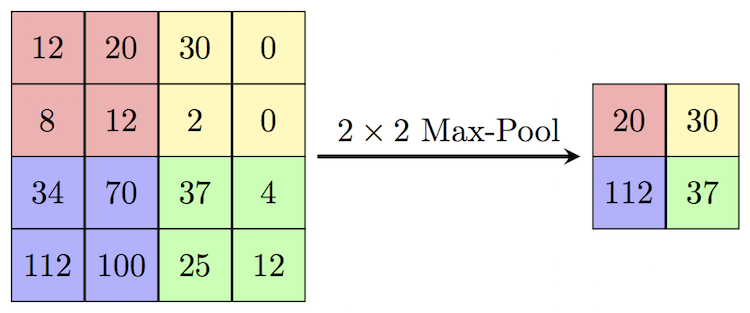

# U-net

>Patch : 이미지 인식 단위

**Contracting Path + Expanding Path**, **Overlap-tile**, **data argumentation**

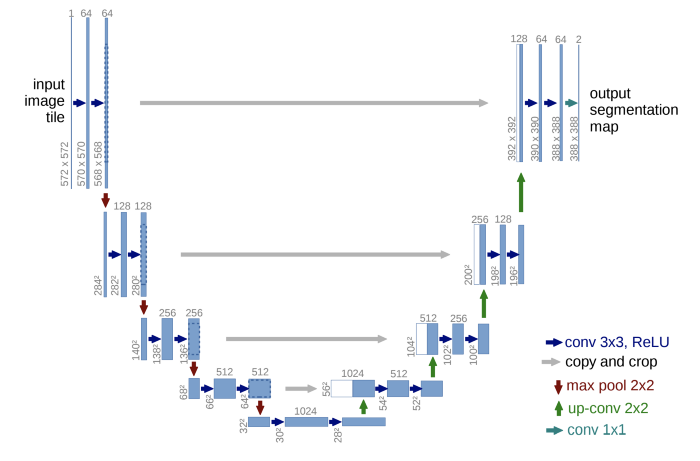

## 1.contracting path+expanding path
* contracting Path: Encoding, img의 context 포착
* Expanding Path: Decoding, feature map을 upsampling하고, encoding중에 포착한 feature map의 context와 결합 > 더욱 정확한 localization

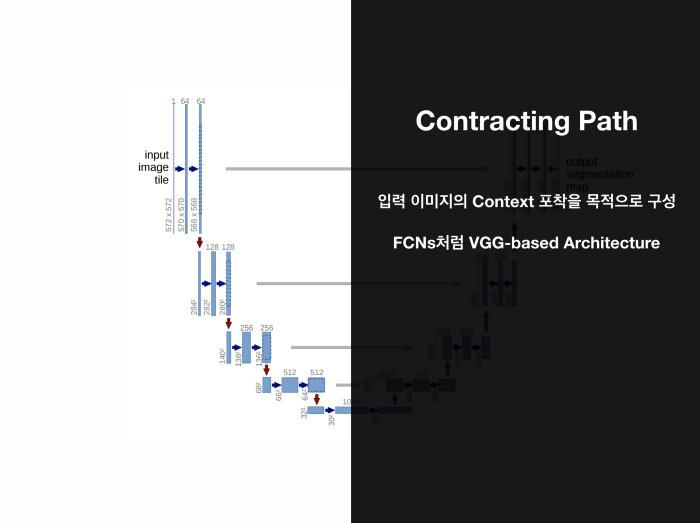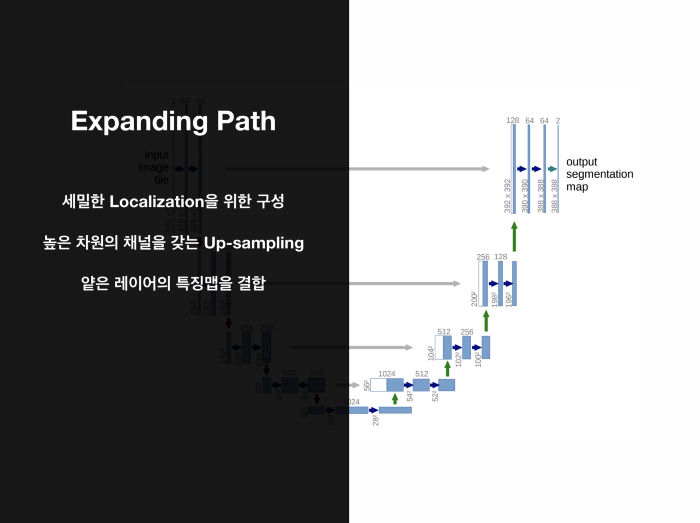

### 1) conv3x3, ReLU

1. conv3x3 
- 두 차례씩 반복
- convolution에는 relu와 normalization 포함

2. relu
- activation 함수
- param을 줄여, 과적합 방지

3. batch normalization
- 활성화함수의 활성화값 또는 출력값을 정규화(정규분포로 만든다)
- 신경망의 각 layer에서 데이터(배치)의 분포를 정규화하는 작업
- 일종의 노이즈를 추가하는 방법으로 (bias와 유사) 이는 배치마다 정규화를 함으로써 전체 데이터에 대한 평균의 분산과 값이 달라질 수 있다. 
- 학습을 할 때마다 활성화값/출력값을 정규화하기 때문에 초기화(가중치 초깃값) 문제에서 비교적 자유로워진다

> 각 hidden layer에서 정규화를 하면서 입력분포가 일정하게 되고, 이에 따라 Learning rate을 크게 설정해도 괜찮아진다. 결과적으로 학습속도가 빨라지게 된다.

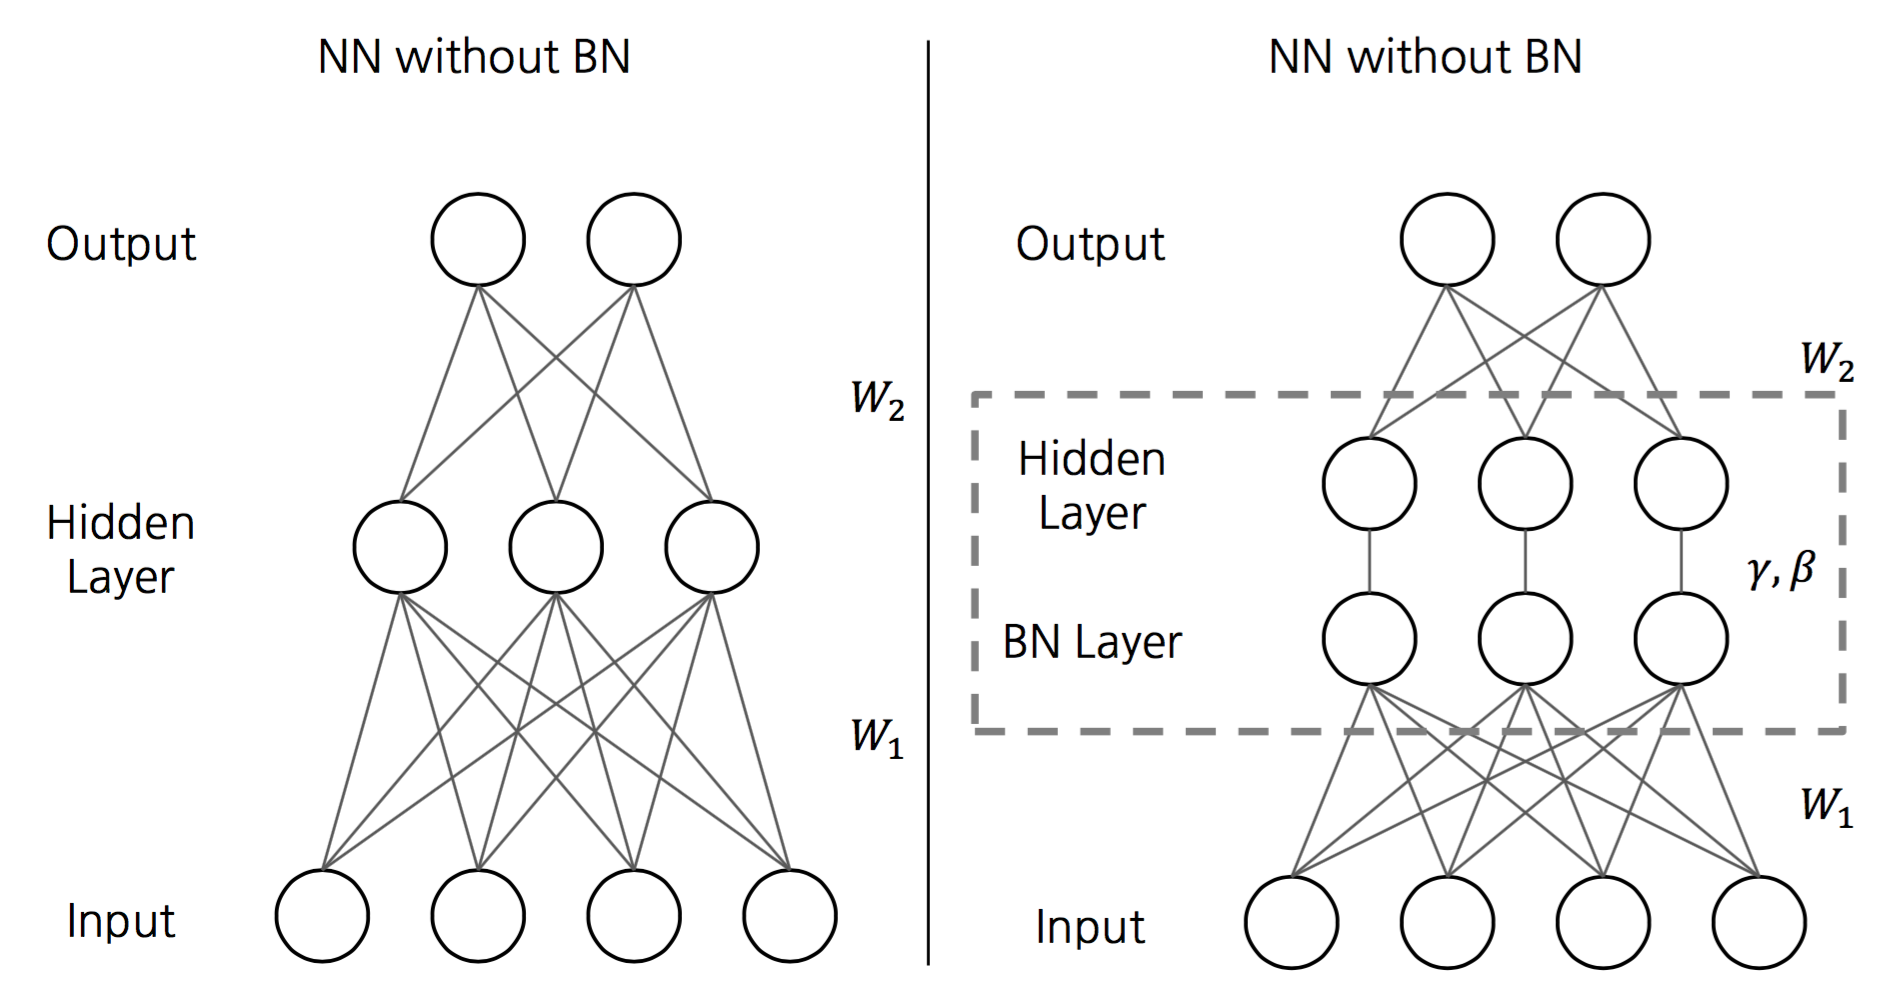


### 2) Max pool 2x2
- stride=2
- Down sampling마다 ch 수를 2배로 늘림

--------

### 3) up sampling
- 2x2
- ch 수가 절반으로 줄어듬

### 4) conv3x3, relu
- 1)과 동일
- 단 padding이 없으므로 feature map이 조금씩 줄어듬


### 5) conv1x1
- 마지막 layer에 비선형 predict을 위해 추가

## 2) Overlap -Tite Input

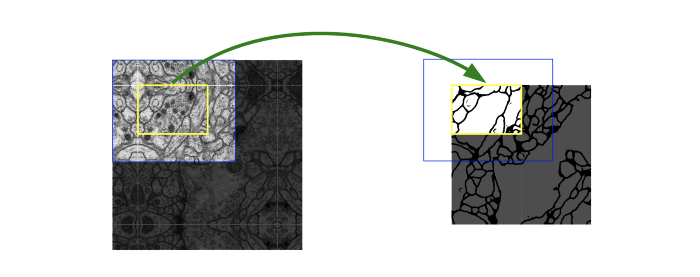

파란 부분의 img를 입력하면 노란 영역의 segmentation 결과를 얻는다

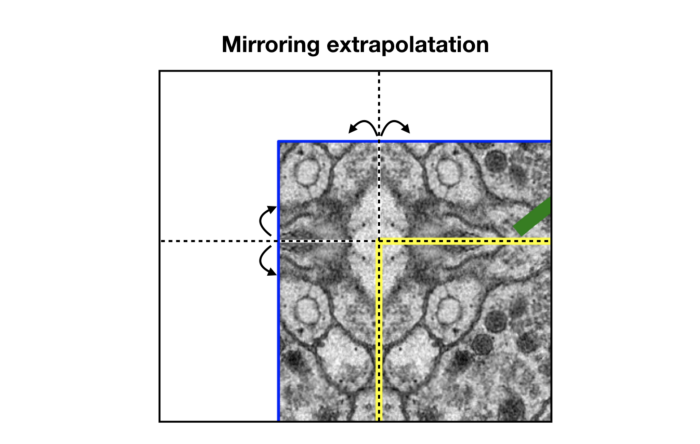

- 이미지의 경계 부분 픽셀에 대한 세그멘테이션을 위해 0이나 임의의 패딩값을 사용하는 대신 이미지 경계 부분의 미러링을 이용한 Extrapolation 기법을 사용